In [66]:
# IMPORTING MODULES
import glob
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.signal as ss
import sys
module_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sb
import train
import tools.data_reader_apd as dr_a
import tools.data_reader_wesad as dr_w
import tools.data_reader_popane as dr_p
import tools.display_tools as dt
import tools.preprocessing as preprocessing

from scipy.fft import fft, fftfreq, fftshift

import cvxopt.solvers
cvxopt.solvers.options['show_progress'] = False

In [75]:
metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    # train.Metrics.HF_RR, 
    # train.Metrics.LF_RR, 
    train.Metrics.IBI, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE
]

temp_a, _ = train.Train_APD.get_apd_data_ranking([train.Metrics.BPM], phases=dr_a.Phases.PHASES_LIST)
idx = temp_a[temp_a["bpm"] > 200].index 
invalid_apd_subjects = set(temp_a["subject"].iloc[idx].tolist())
idx = temp_a[temp_a["bpm"] < 35].index 
invalid_apd_subjects.update(set(temp_a["subject"].iloc[idx].tolist()))

def plot_metric_pair(metric_a, metric_b, labels, plot_labels):
    plt.figure()
    for i in range(len(metric_a)):
        if labels[i] == 1:
            color = "r"
        else:
            color = "b"
        plt.scatter(metric_a[i], metric_b[i], c=color, s=plt.rcParams['lines.markersize'] ** 1)
    plt.xlabel(plot_labels[0])
    plt.ylabel(plot_labels[1])
    plt.show()
        

In [ ]:
# APD
importlib.reload(train)

for i in range(len(metrics)):
    for j in range(i+1, len(metrics)):
        metric_a, _ = train.Train_APD.get_apd_data_ranking(metrics=[metrics[i]], phases=dr_a.Phases.PHASES_LIST, normalize=True)
        metric_b, label = train.Train_APD.get_apd_data_ranking(metrics=[metrics[j]], phases=dr_a.Phases.PHASES_LIST, normalize=True)

        metric_a = metric_a[~metric_a["subject"].isin(invalid_apd_subjects)]
        metric_b = metric_b[~metric_b["subject"].isin(invalid_apd_subjects)]
        label = label[~label["subject"].isin(invalid_apd_subjects)]
        
        # print(f"{metric_a.shape[0]}, {metric_b.shape[0]}, {label.shape[0]}")

        # temp = pd.concat([metric_a, metric_b], axis=1)
        # for i in range(temp.shape[0] // 10):
        #     print(temp.iloc[i*10:i*10+10, :])
        # print(temp.iloc[i*10:, :])

        metric_a = metric_a[metrics[i]].tolist()
        metric_b = metric_b[metrics[j]].tolist()
        plot_metric_pair(metric_a, metric_b, label["label"].tolist(), [metrics[i], metrics[j]])


In [ ]:
# WESAD
importlib.reload(train)

for i in range(len(metrics)):
    for j in range(i+1, len(metrics)):
        metric_a, _ = train.Train_WESAD.get_wesad_data(metrics=[metrics[i]], phases=dr_w.Phases.PHASE_ORDER, normalize=True)
        metric_b, label = train.Train_WESAD.get_wesad_data(metrics=[metrics[j]], phases=dr_w.Phases.PHASE_ORDER, normalize=True)

        # print(f"{metric_a.shape[0]}, {metric_b.shape[0]}, {label.shape[0]}")

        # temp = pd.concat([metric_a, metric_b], axis=1)
        # for i in range(temp.shape[0] // 10):
        #     print(temp.iloc[i*10:i*10+10, :])
        # print(temp.iloc[i*10:, :])

        metric_a = metric_a[metrics[i]].tolist()
        metric_b = metric_b[metrics[j]].tolist()
        plot_metric_pair(metric_a, metric_b, label["label"].tolist(), [metrics[i], metrics[j]])


422, 422, 422


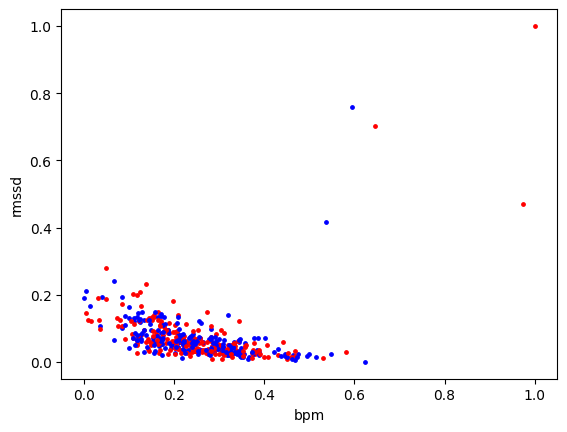

422, 422, 422


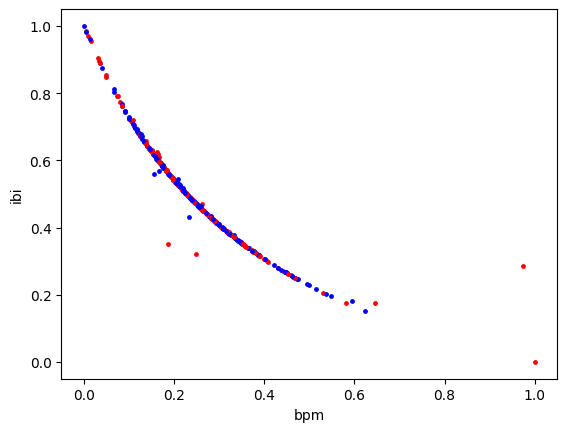

422, 422, 422


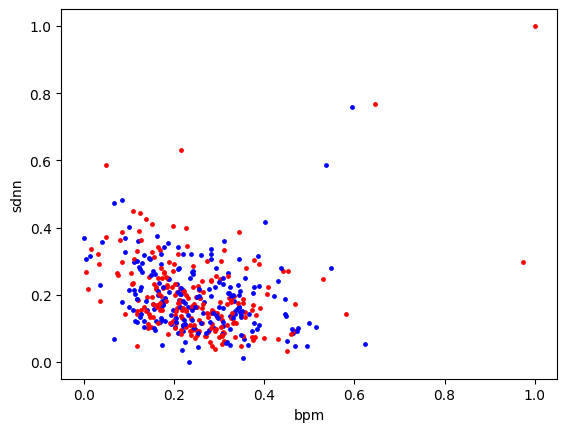

422, 417, 417


IndexError: list index out of range

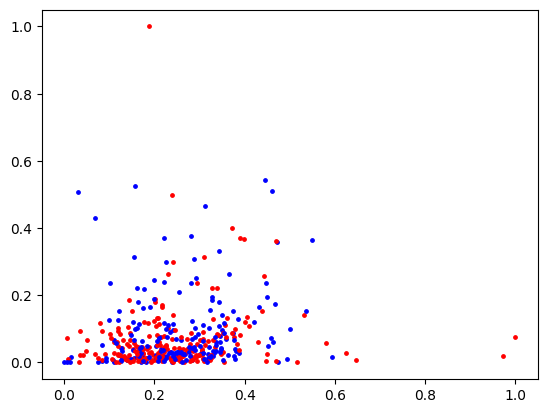

In [76]:
# POPANE 
importlib.reload(train)

studies_popane = [
    "Study1",
    "Study2",
    "Study3",
    # "Study4",
    "Study5",
    # "Study6",
    # "Study7"
]

model_phases_popane = [
    dr_p.Study1.ALL,
    # [dr_p.Study1.BASELINE, dr_p.Study1.POSITIVE_EMOTION_HIGH_APPROACH, dr_p.Study1.THREAT],
    dr_p.Study2.ALL,
    dr_p.Study3.ALL,
    # dr_p.Study4.ALL,
    dr_p.Study5.ALL
    # dr_p.Study6.ALL
    # dr_p.Study7.ALL
]

for i, study in enumerate(studies_popane):
    for i in range(len(metrics)):
        for j in range(i+1, len(metrics)):
            metric_a, _ = train.Train_POPANE.get_popane_data(study, metrics=[metrics[i]], phases=model_phases_popane[i], normalize=True)
            metric_b, label = train.Train_POPANE.get_popane_data(study, metrics=[metrics[j]], phases=model_phases_popane[i], normalize=True)
            
            print(f"{metric_a.shape[0]}, {metric_b.shape[0]}, {label.shape[0]}")

            # temp = pd.concat([metric_a, metric_b], axis=1)
            # for i in range(temp.shape[0] // 10):
            #     print(temp.iloc[i*10:i*10+10, :])
            # print(temp.iloc[i*10:, :])

            metric_a = metric_a[metrics[i]].tolist()
            metric_b = metric_b[metrics[j]].tolist()
            plot_metric_pair(metric_a, metric_b, label["label"].tolist(), [metrics[i], metrics[j]])
